COMP90024 Project Team 1

Authors:
- Zhuoyang Hao (1255309)
- Haoyi Li (1237964)
- Zilin Su (1155122)
- Angela Yifei Yuan (1269549)

In [1]:
import requests

In [2]:
request_toots = requests.get("http://localhost:9090/getalltoots")

In [3]:
data = request_toots.json()

In [4]:
content_list = [item['_source']['content'] for item in data]

In [5]:
len(content_list)

3829

In [6]:
remove_none_content_list = [content for content in content_list if content]

In [14]:
total_toots = len(remove_none_content_list)

In [8]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize NLTK's lemmatizer and stopwords list
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(sentence):
    # Tokenize the sentence
    words = word_tokenize(sentence) 
    # Clean and lowercase each word
    words = [re.sub(r"[^\w']", '', word).lower() for word in words] 
    # Remove stopwords and empty strings
    words = [word for word in words if word not in stop_words and word != '']
    #lemmatize each word
    words = [lemmatizer.lemmatize(word) for word in words]

    return words

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/henrik_hao/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/henrik_hao/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/henrik_hao/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
preprocessed_content_list = [preprocess_text(sentence) for sentence in remove_none_content_list]

In [10]:
weather_keywords = [
    'weather', 'temperature', 'rain', 'snow', 'storm', 'wind', 'cloud', 'sunny',
    'humid', 'humidity', 'forecast', 'climate', 'thunder', 'lightning', 'cold',
    'hot', 'warm', 'cool', 'freezing', 'breeze', 'hail', 'flood', 'drought', 'aurora'
]

air_quality_keywords = [
    'air', 'quality', 'pollution', 'pm10', 'pm2.5', 'ozone', 'aqi', 'smog', 'haze',
    'clean', 'dirty', 'particles', 'particulate', 'emission', 'carbon', 'co2',
    'monoxide', 'dioxide', 'so2', 'sulfur', 'methane', 'nh3', 'ammonia', 'nox',
    'no2', 'nitrogen'
]

def is_weather_related(tokens, weather_keywords):
    for token in tokens:
        if token in weather_keywords:
            return True
    return False

def is_air_quality_related(tokens, air_quality_keywords):
    for token in tokens:
        if token in air_quality_keywords:
            return True
    return False

weather_related = [
    tokens for tokens in preprocessed_content_list if is_weather_related(tokens, weather_keywords)
]
aq_related = [
    tokens for tokens in preprocessed_content_list if is_air_quality_related(tokens, air_quality_keywords)
]

In [15]:
weather_related_toots = len(weather_related)

In [16]:
aq_related_toots = len(aq_related)

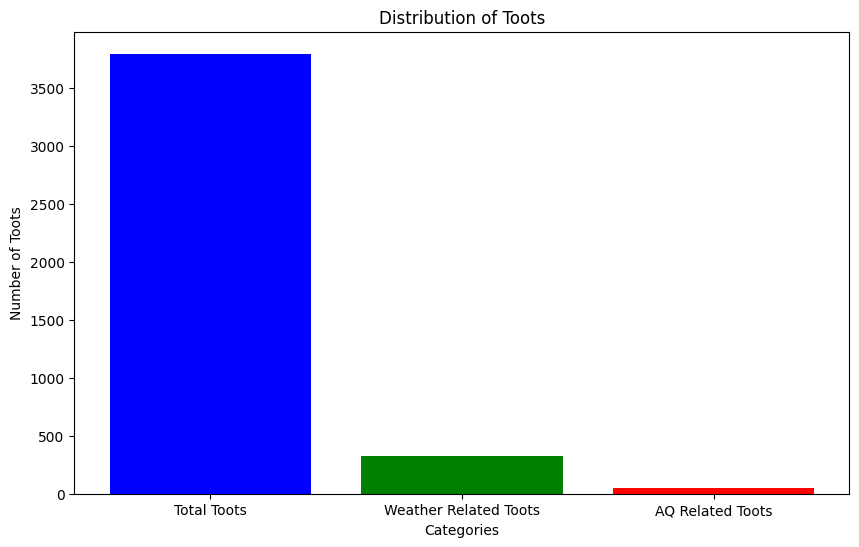

In [17]:
import matplotlib.pyplot as plt
data = [total_toots, weather_related_toots, aq_related_toots]
labels = ['Total Toots', 'Weather Related Toots', 'AQ Related Toots']

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.bar(labels, data, color=['blue', 'green', 'red'])
plt.xlabel('Categories')
plt.ylabel('Number of Toots')
plt.title('Distribution of Toots')
plt.show()